### Data Preparation

In [1]:
# initialize spark session
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import warnings
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

In [2]:
# Using this syntax, we can drop any row with missing data. Three rows are dropped.
import pyspark.sql.functions as func
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import dayofmonth,month,hour,year,format_number
from pyspark.sql.types import (StructField, StructType,
                               TimestampType, IntegerType, FloatType)

In [3]:
# Import the relevant Python libraries.
import numpy as np
import pandas as pd 
# Transform PySpark data frame `df` to Python data frame `data`
#data = df.toPandas()
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [4]:
df = spark.read.csv('cardio_train.csv', header=True, inferSchema=True)

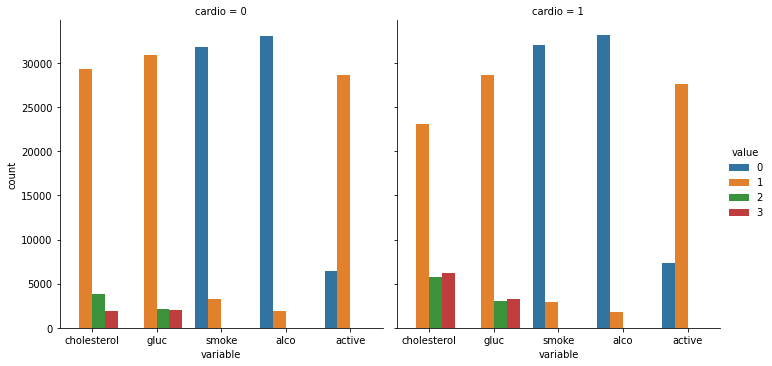

In [5]:
data = df.toPandas()
data_long = pd.melt(data, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=data_long, kind="count");

In [6]:
# We can also group, and show the averages of each group.
df.groupBy('gender').mean('height').show()

+------+------------------+
|gender|       avg(height)|
+------+------------------+
|     1|161.35561168460356|
|     2|169.94789538210054|
+------+------------------+



In [7]:
df.groupBy('gender').sum('alco').show()

+------+---------+
|gender|sum(alco)|
+------+---------+
|     1|     1161|
|     2|     2603|
+------+---------+



In [8]:
df.groupBy('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|     1|45530|
|     2|24470|
+------+-----+



In [9]:
df.groupBy('cardio').count().show()

+------+-----+
|cardio|count|
+------+-----+
|     1|34979|
|     0|35021|
+------+-----+



In [10]:
df.groupBy('gender').sum('cardio').show()

+------+-----------+
|gender|sum(cardio)|
+------+-----------+
|     1|      22616|
|     2|      12363|
+------+-----------+



In [11]:
df.stat.crosstab("cardio", "gender").show()

+-------------+-----+-----+
|cardio_gender|    1|    2|
+-------------+-----+-----+
|            1|22616|12363|
|            0|22914|12107|
+-------------+-----+-----+



In [12]:
freq = df.stat.freqItems(["cardio", "gender", "ap_hi"], 0.4)
freq.collect()[0]

Row(cardio_freqItems=[1, 0], gender_freqItems=[2, 1], ap_hi_freqItems=[120, 135])

In [13]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [16]:
df.select([count(when(col('cardio').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (cardio IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [17]:
df.select([count(when(col('age').isNull(),True))]).show()

+--------------------------------------------+
|count(CASE WHEN (age IS NULL) THEN true END)|
+--------------------------------------------+
|                                           0|
+--------------------------------------------+



In [18]:
df.select([count(when(col('gender').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (gender IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [19]:
df.select([count(when(col('height').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (height IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [20]:
df.select([count(when(col('weight').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (weight IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [21]:
df.select([count(when(col('ap_hi').isNull(),True))]).show()

+----------------------------------------------+
|count(CASE WHEN (ap_hi IS NULL) THEN true END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+



In [22]:
df.select([count(when(col('ap_lo').isNull(),True))]).show()

+----------------------------------------------+
|count(CASE WHEN (ap_lo IS NULL) THEN true END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+



In [23]:
print((df.count(), len(df.columns)))

(70000, 13)


In [24]:
df.withColumn('years',func.round(df['age']/365, 0)).show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+-----+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|years|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+-----+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0| 50.0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1| 55.0|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1| 52.0|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1| 48.0|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0| 48.0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0| 60.0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0| 61.0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   

<AxesSubplot:xlabel='variable', ylabel='value'>

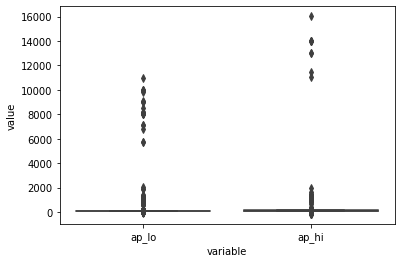

In [25]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())